## Unveiling Fraud Detection AI Model for Data Scientist using `Boolean Rule Column Generation explainer.`  provided by AI 360 Explainability Toolkit.

### Install the required Libraries.  

* Uncomment them and Run the Cells. 

In [ ]:
#!pip install pandas_profiling

In [ ]:
#!pip install lightgbm

In [ ]:
# !pip install aix360

## Part-1 of the Notebook.

Using the `Fraud-Predict-Data`, we will do
  * Exploratory Data Analysis
  * Build Lightgbm model.
  * Feature importance. 
  * interpreting the model attributes using Shap for improving the accuracy.

### Import the Libraries. 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import ipaddress
import pandas_profiling as pp
%matplotlib inline
from sklearn import preprocessing
plt.rc("font", size=14)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Load the `Fraud-Data` as csv in the notebook. 

* Click on the `0100` on the top right corner. 
* Drag and Drop `Fraud-Data.csv` 
* Select the Cell below. 
* Click on `Insert to Code` and then `Pandas Dataframe.`



In [ ]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_554c07c959184a5fb85f7723b7045646 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LcFOxAeI1SgkmxN5c5YiOXLFytY-nF4IX4qVUCVKHjiG',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_554c07c959184a5fb85f7723b7045646.get_object(Bucket='fraudpredictionseries-donotdelete-pr-goroseftzd9ob6',Key='fraud_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
print(df.head())
print(df.shape)

In [ ]:
pp.ProfileReport(df)

We can observe that there are no missing values and no duplicates. We can do detailed analysis of each attribute to understand the data better. 

In [ ]:
count_fraud = len(df[df['Fraud_Risk']==0])
count_non_fraud = len(df[df['Fraud_Risk']==1])
pct_of_non_fraud = count_non_fraud/(count_non_fraud +count_fraud)
print("percentage of non Fraud Risk is", round(pct_of_non_fraud*100,2))
pct_of_fraud = count_fraud/(count_non_fraud +count_fraud)
print("percentage of Fraud Risk", round(pct_of_fraud*100,2))

Plot the target attribute

In [ ]:
sns.countplot(x='Fraud_Risk',data=df, palette='hls')
plt.show()

In [ ]:
df.groupby('Fraud_Risk').mean()

In [ ]:
df.corr(method ='pearson') 

We can observe strong positive co-relation between the attributes Married & Self Employed to the target variable which is Fraud Risk.

### Select input and target variables

In [ ]:
X = df[df.columns[0:12]]
y = df[df.columns[12:]]

In [ ]:
df.dtypes

We can observe that all the attributes are in Int data type.

Check for null values

In [ ]:
df.isna()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Splitting the data with 70:30 mix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print("Train_x Shape :: ", X_train.shape)
print("Train_y Shape :: ", y_train.shape)
print("Test_x Shape :: ", X_test.shape)
print("Test_y Shape :: ", y_test.shape)

In [ ]:
d_train = lgb.Dataset(X_train, label=y_train)

### Building the model with default parameters

In [ ]:
def LGBM_classifier(features, target):
    """
    To train the LGBM classifier with features and target data
    :param features:
    :param target:
    :return: trained LGBM classifier
    """
    model = LGBMClassifier(metric='binary_logloss', objective='binary')
    model.fit(features, target)
    return model

start = time.time()
trained_model = LGBM_classifier(X_train, y_train.values.ravel())
print("> Completion Time : ", time.time() - start)
print("Trained LGBM model :: ", trained_model)
predictions = trained_model.predict(X_test)

In [ ]:
print("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print("LGBM Model Test Accuracy is :: ", accuracy_score(y_test, predictions))

#### We can observe that the model has achieved 92% accuracy on test data and 100% accuracy on train data.

In [ ]:
print(" Confusion matrix ", confusion_matrix(y_test, predictions))

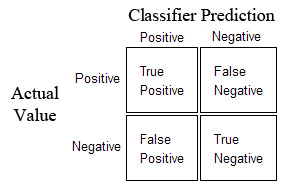

### Check the Feature Importance. 

In [ ]:
feat_imp = pd.Series(trained_model.feature_importances_, index=X.columns)
feat_imp.nlargest(12).plot(kind='barh', figsize=(8,10))

Feature importance as per the model

### SHAP (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model. 

In [ ]:
!pip install shap

In [ ]:
import shap
shap.initjs()

In [ ]:
shap_values = shap.TreeExplainer(trained_model.booster_).shap_values(X_train)

In [ ]:
shap.summary_plot(shap_values, X_train)

We can observe that attributes like Married, ApplicantIncome, Credit_History_Available, LoanAMount & CoapplicantIncome have high impact on the target variable. 

### In this notebook, we have done exploratory data analysis, feature importance, model building & interpreting the model attributes for improving the accuracy. This is to demonstrate some of the mandatory steps which are involved in building predictive models which are done manually. These steps can take days to complete. All these steps are automated in AutoAI feature in Watson Studio where we can create and deploy machine learning models in minutes. 

## Part-2 

* Unveiling Fraud Detection AI Model for Data Scientist using `Boolean Rule Column Generation explainer` and `Logistic Rule Regression models` provided by AI 360 Explainability Toolkit.

#### Data scientist: Boolean Rule and Logistic Rule Regression models
In evaluating a machine learning model for deployment, a data scientist would ideally like to understand the behavior of the model as a whole, not just in specific instances (e.g. specific loan applicants). This is especially true in regulated industries such as banking where higher standards of explainability may be required.

For example, the data scientist may have to present the model to: 
1) technical and business managers for review before deployment, 
2) a lending expert to compare the model to the expert's knowledge, or
3) a regulator to check for compliance. 



#### BRCG, which is designed to produce a very simple OR-of-ANDs rule (known more formally as disjunctive normal form, DNF) or alternatively an AND-of-ORs rule (conjunctive normal form, CNF) to predict whether an applicant is not at Fraud risk (Y = 1). For a binary classification problem such as we have here, a DNF rule is equivalent to a rule set, where AND clauses in the DNF correspond to individual rules in the rule set. Furthermore, it can be shown that a CNF rule for Y = 1 is equivalent to a DNF rule for Y = 0. 

BRCG is distinguished by its use of the optimization technique of column generation to search the space of possible clauses, which is exponential in size. To learn more about column generation, please see [NeurIPS paper.](https://proceedings.neurips.cc/paper/2018/hash/743394beff4b1282ba735e5e3723ed74-Abstract.html)



In [2]:
# load the data again, in the cell below and name the dataframe as `df`

#### load the data again here! Follow the steps: 

* Load the Fraud-Data as csv in the notebook.
* Click on the 0100 on the top right corner.
* Drag and Drop Fraud-Data.csv
* Click on Insert to Code and then Pandas Dataframe.
* Name the dataframe as `df`


In [ ]:
X = df[df.columns[0:12]]
y = df["Fraud_Risk"]

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
dfTrain, dfTest, yTrain, yTest = train_test_split(X, y, random_state=0,test_size=0.3)
dfTrain.head().transpose()

In [ ]:
print(dfTrain.shape)
print(yTrain.shape)

In [ ]:
# Binarize data and also return standardized ordinal features
from aix360.algorithms.rbm import FeatureBinarizer
fb = FeatureBinarizer(negations=True, returnOrd=True)
dfTrain, dfTrainStd = fb.fit_transform(dfTrain)
dfTest, dfTestStd = fb.transform(dfTest)
dfTrain['ApplicantIncome'].head()

In [ ]:
dfTrain

In [ ]:
print(dfTrain.shape)
print(yTrain.shape)

In [ ]:
# Instantiate BRCG with small complexity penalty and large beam search width
from aix360.algorithms.rbm import BooleanRuleCG
br = BooleanRuleCG(lambda0=1e-3, lambda1=1e-3, CNF=True)

# Train, print, and evaluate model
br.fit(dfTrain, yTrain)

In [ ]:
# Instantiate BRCG with small complexity penalty and large beam search width
from aix360.algorithms.rbm import BRCGExplainer, BooleanRuleCG
# lambda0=1e-3, lambda1=1e-3, CNF=True

boolean_model = BooleanRuleCG(CNF=True)
explainer = BRCGExplainer(boolean_model)
explainer.fit(dfTrain, yTrain)




In [ ]:
from sklearn.metrics import accuracy_score
print('Training accuracy:', accuracy_score(yTrain, br.predict(dfTrain)))
print('Test accuracy:', accuracy_score(yTest, br.predict(dfTest)))
print('Predict Y=0 if ANY of the following rules are satisfied, otherwise Y=1:')
print(br.explain()['rules'])

In [ ]:
# Instantiate LRR with good complexity penalties and numerical features
from aix360.algorithms.rbm import LogisticRuleRegression
lrr = LogisticRuleRegression(lambda0=0.005, lambda1=0.001, useOrd=True)

# Train, print, and evaluate model
lrr.fit(dfTrain, yTrain, dfTrainStd)
print('Training accuracy:', accuracy_score(yTrain, lrr.predict(dfTrain, dfTrainStd)))
print('Test accuracy:', accuracy_score(yTest, lrr.predict(dfTest, dfTestStd)))
print('Probability of Y=1 is predicted as logistic(z) = 1 / (1 + exp(-z))')
print('where z is a linear combination of the following rules/numerical features:')
lrr.explain()